# **Feature Engineering- Missing Values Day 3**

### **How To Handle Categroical Missing Values**
### **Frequent Category Imputation**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
pd.read_csv('/content/house price prediction.csv')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [6]:
df = pd.read_csv('/content/house price prediction.csv')
df.shape

(1460, 81)

In [7]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [13]:
df=pd.read_csv('/content/house price prediction.csv', usecols=['BsmtQual','FireplaceQu','GarageType' , 'SalePrice'])

In [14]:
df.shape

(1460, 4)

In [15]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [16]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [18]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

**Compute the frequency with every feature**

<Axes: xlabel='BsmtQual'>

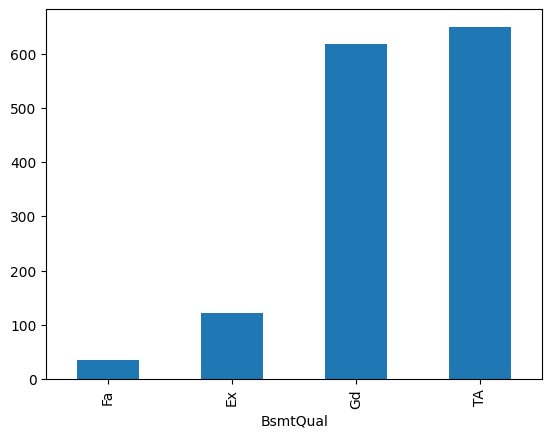

In [22]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values().plot.bar()

<Axes: xlabel='BsmtQual'>

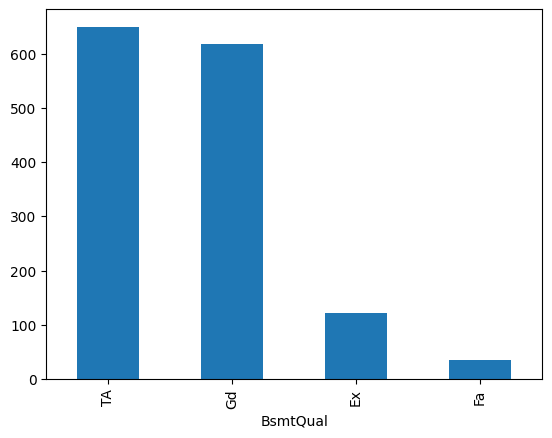

In [23]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<Axes: xlabel='BsmtQual'>

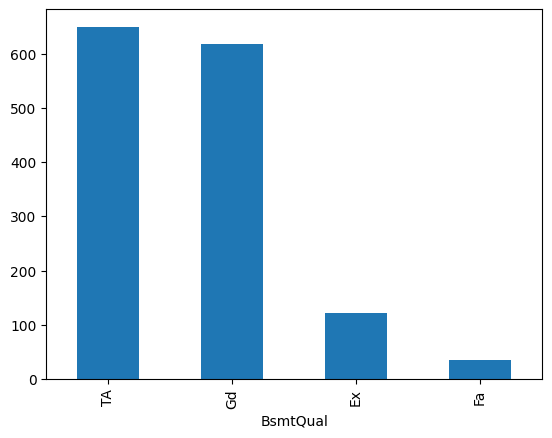

In [24]:
df['BsmtQual'].value_counts().plot.bar()

<Axes: xlabel='GarageType'>

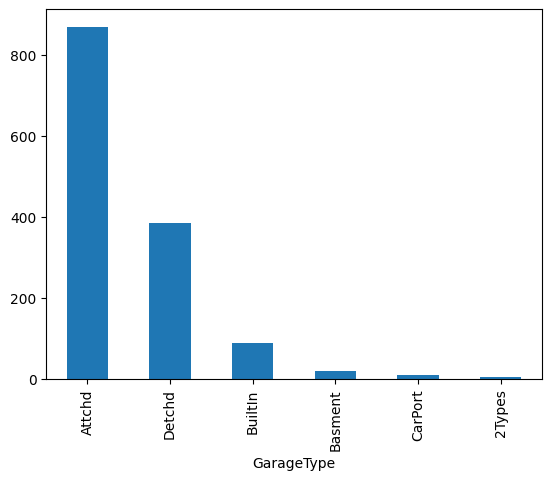

In [25]:
df['GarageType'].value_counts().plot.bar()

<Axes: xlabel='FireplaceQu'>

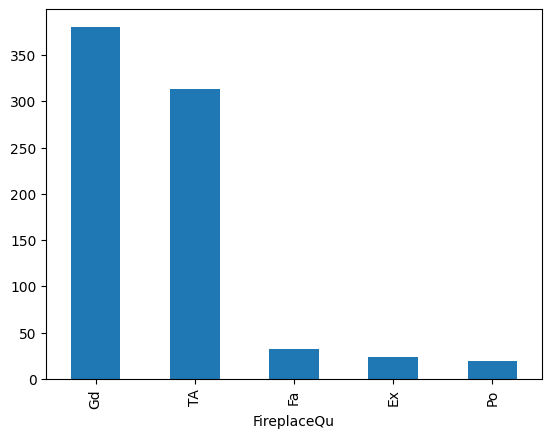

In [26]:
df['FireplaceQu'].value_counts().plot.bar()

In [27]:
df['GarageType'].value_counts().index[0]

'Attchd'

In [28]:
df['GarageType'].value_counts().index[2]

'BuiltIn'

In [30]:

df['GarageType'].mode()[0]

'Attchd'

In [31]:
def impute_nan(df,variable):
    most_frequent_category = df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [32]:
for feaure in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feaure)

In [33]:
df.isnull().sum()

BsmtQual       0
FireplaceQu    0
GarageType     0
SalePrice      0
dtype: int64

In [34]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64


### Advantages
1. Easy To implement
2. Fater way to implement

###Disadvantages
1. Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's.
2. It distorts the relation of the most frequent label

### **Adding a variable to capture NAN**

In [35]:
df = pd.read_csv('/content/house price prediction.csv', usecols=['BsmtQual','FireplaceQu','GarageType' , 'SalePrice'])

In [36]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [37]:
df['BsmtQual_var'] = np.where(df['BsmtQual'].isnull(),1,0)

In [38]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [40]:
df.shape

(1460, 5)

In [41]:
df.head(25)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0
5,Gd,NaN,Attchd,143000,0
6,Ex,Gd,Attchd,307000,0
7,Gd,TA,Attchd,200000,0
8,TA,TA,Detchd,129900,0
9,TA,TA,Attchd,118000,0


In [42]:
frequent = df['BsmtQual'].mode()[0]

In [44]:
df['BsmtQual'].fillna(frequent)

0       Gd
1       Gd
2       Gd
3       TA
4       Gd
        ..
1455    Gd
1456    Gd
1457    TA
1458    TA
1459    TA
Name: BsmtQual, Length: 1460, dtype: object

In [45]:
df['BsmtQual'].fillna(frequent, inplace=True)

In [46]:

df['FireplaceQu_Var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent,inplace=True)

In [48]:
df.head(20)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_Var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0
5,Gd,Gd,Attchd,143000,0,1
6,Ex,Gd,Attchd,307000,0,0
7,Gd,TA,Attchd,200000,0,0
8,TA,TA,Detchd,129900,0,0
9,TA,TA,Attchd,118000,0,0


### Suppose if you have more frequent categories, we just replace NAN with a new category

In [49]:
df=pd.read_csv('/content/house price prediction.csv', usecols=['BsmtQual','FireplaceQu','GarageType' , 'SalePrice'])

In [50]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [51]:
def impute_nan(df,variable):
    df[variable+"newvar"]=np.where(df[variable].isnull(),"Missing",df[variable])

The impute_nan function in the given code is designed to create a new column in the DataFrame that labels missing values in a specified column. If a value is missing (NaN), it labels it as "Missing"; otherwise, it keeps the original value.

The np.where function is used to conditionally assign values:

If a value in the specified column (variable) is NaN (missing), it assigns the string "Missing" to the corresponding entry in the new column.

If a value is not NaN, it assigns the original value from the specified column to the corresponding entry in the new column.

In [52]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)

In [54]:
df.head(25)

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd
5,Gd,NaN,Attchd,143000,Gd,Missing,Attchd
6,Ex,Gd,Attchd,307000,Ex,Gd,Attchd
7,Gd,TA,Attchd,200000,Gd,TA,Attchd
8,TA,TA,Detchd,129900,TA,TA,Detchd
9,TA,TA,Attchd,118000,TA,TA,Attchd


In [55]:
df=df.drop(['BsmtQual','FireplaceQu','GarageType'],axis=1)


In [56]:
df.head()

,SalePrice,BsmtQualnewvar,FireplaceQunewvar,GarageTypenewvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
